In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

## Rolling and expanding windows.
1. Rolling windows: Aggregate data to apply a function to them. They move along the time series. Valueable information is near and behind a point in time.
1. Expanding windows: Cummulative information. Valuable information is composed of all the previous data.

In [ ]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [3]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])
df.head()

,A,B,C
2016-07-01 00:00:00,1.345881,-0.457081,0.106637
2016-07-01 00:00:01,-0.695878,-1.525255,1.811092
2016-07-01 00:00:02,0.813101,0.627114,0.456756
2016-07-01 00:00:03,0.064763,-1.126753,-0.002702
2016-07-01 00:00:04,-0.928621,-0.511808,-0.661830


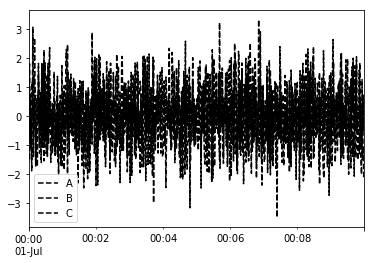

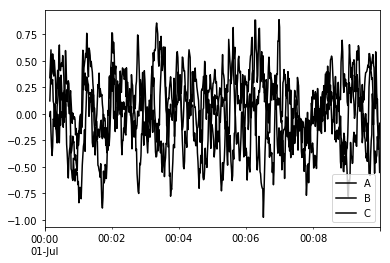

In [4]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [ ]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

In [ ]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [ ]:
df.head()

In [ ]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [ ]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

In [ ]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

In [ ]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?

In [ ]:
# EWMA
# Why use EWMA?

In [ ]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [ ]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting